In [79]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
#read in csvs 1. nyt_api = all nyt api scrape 2. goodreads1 = everything from 1st goodreads scrape 3. goodreads2 = everything from second scrape
nyt_api = pd.read_csv(r"C:\Users\melan\Documents\DA8\Projects\bestseller_capstone\data\merged_dataframe.csv")
goodreads1 = pd.read_csv(r"C:\Users\melan\Documents\DA8\Projects\bestseller_capstone\data\clean_goodreads.csv")
goodreads2 = pd.read_csv(r"C:\Users\melan\Documents\DA8\Projects\bestseller_capstone\data\goodreads_found_june10.csv")

In [6]:
nyt_api.head(5)

,title,description,contributor,author,contributor_note,price,age_group,publisher,primary_isbn13,primary_isbn10,rank,rank_last_week,weeks_on_list,asterisk,dagger,week,nyt_list,file,month
0,FULL PACKAGE,A man shares a cramped apartment with his frie...,by Lauren Blakely,Lauren Blakely,NaN,0.0,NaN,Lauren Blakely,A00B01MT5HMRV,None,1,0,1,0,0,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN
1,THE GUERNSEY LITERARY AND POTATO PEEL PIE SOCIETY,"After World War II, a journalist travels to th...",by Mary Ann Shaffer and Annie Barrows,Mary Ann Shaffer and Annie Barrows,NaN,0.0,NaN,Dial,9780440337973,0440337976,2,0,2,0,0,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN
2,THE WHISTLER,A whistleblower alerts a Florida investigator ...,by John Grisham,John Grisham,NaN,0.0,NaN,Doubleday,9780385541206,0385541201,3,4,12,0,0,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN
3,RING OF FIRE,"Pike Logan, a member of a secret counterterror...",by Brad Taylor,Brad Taylor,NaN,0.0,NaN,Dutton,9781101984772,None,4,0,1,0,0,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN
4,SMALL GREAT THINGS,"A medical crisis entangles a black nurse, a wh...",by Jodi Picoult,Jodi Picoult,NaN,0.0,NaN,Ballantine,9780345544964,034554496X,5,7,9,0,0,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN


In [7]:
len(nyt_api)

32216

In [10]:
goodreads1.head()

,Unnamed: 0,isbn,title,author,avg_rating,count_rating,count_reviews,date_published,top_genre,genre1,genre2,genre3
0,0,9780440337973,The Guernsey Literary and Potato Peel Pie Society,Mary Ann Shaffer,4.19,721465.0,60356.0,2008-07-29,"Historical Fiction, Fiction, Romance, Historic...",Historical Fiction,Fiction,Romance
1,1,9780385541206,The Whistler,John Grisham,3.95,120472.0,7710.0,2016-10-25,"Fiction, Mystery, Thriller, Audiobook, Crime, ...",Fiction,Mystery,Thriller
2,2,9781101984772,Ring of Fire,Brad Taylor,4.28,4371.0,230.0,2017-01-10,"Thriller, Fiction, Action, Military Fiction, S...",Thriller,Fiction,Action
3,3,9780345544964,Small Great Things,Jodi Picoult,4.35,342790.0,30250.0,2016-10-11,"Fiction, Contemporary, Audiobook, Adult, Adult...",Fiction,Contemporary,Audiobook
4,4,9781476738031,A Man Called Ove,Fredrik Backman,4.38,917052.0,98756.0,2012-08-27,"Fiction, Contemporary, Audiobook, Humor, Adult...",Fiction,Contemporary,Audiobook


In [12]:
len(goodreads1)

6828

In [11]:
goodreads2.head()

,Unnamed: 0,title,author,avg_rating,count_rating,count_reviews,date_published,top_genre
0,0,Full Package,Lauren Blakely,4.04,13935.0,1313.0,"First published January 9, 2017","Genres, Romance, Contemporary Romance, Contemp..."
1,1,Shelter for Adeline,Susan Stoker,4.46,3297.0,275.0,"Published January 10, 2017","Genres, Romance, Romantic Suspense, Contempora..."
2,2,Until Ashlyn,Aurora Rose Reynolds,4.19,13597.0,1112.0,"First published December 27, 2016","Genres, Romance, Contemporary, Contemporary Ro..."
3,3,Melt,Helen Hardt,4.34,12645.0,637.0,"Published December 20, 2016","Genres, Romance, Erotica, Contemporary Romance..."
4,4,Craving,Helen Hardt,3.99,35898.0,2784.0,"First published May 3, 2016","Genres, Romance, Erotica, Contemporary Romance..."


In [15]:
len(goodreads2)

1163

In [19]:
#convert isbn data types for a merge
nyt_api['primary_isbn13'] = nyt_api['primary_isbn13'].astype(str)
goodreads1['isbn'] = goodreads1['isbn'].astype(str)

In [20]:
#merge all nyt info with everything from 1st gr scrape on isbn
nyt_with_goodreads1 = pd.merge(nyt_api, goodreads1, left_on='primary_isbn13', right_on='isbn')

In [21]:
len(nyt_with_goodreads1)

31761

In [23]:
nyt_with_goodreads1.head()

,title_x,description,contributor,author_x,contributor_note,price,age_group,publisher,primary_isbn13,primary_isbn10,rank,rank_last_week,weeks_on_list,asterisk,dagger,week,nyt_list,file,month,Unnamed: 0,isbn,title_y,author_y,avg_rating,count_rating,count_reviews,date_published,top_genre,genre1,genre2,genre3
0,THE GUERNSEY LITERARY AND POTATO PEEL PIE SOCIETY,"After World War II, a journalist travels to th...",by Mary Ann Shaffer and Annie Barrows,Mary Ann Shaffer and Annie Barrows,NaN,0.0,NaN,Dial,9780440337973,0440337976,2,0,2,0,0,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN,0,9780440337973,The Guernsey Literary and Potato Peel Pie Society,Mary Ann Shaffer,4.19,721465.0,60356.0,2008-07-29,"Historical Fiction, Fiction, Romance, Historic...",Historical Fiction,Fiction,Romance
1,THE GUERNSEY LITERARY AND POTATO PEEL PIE SOCIETY,"After World War II, a journalist travels to th...",by Mary Ann Shaffer and Annie Barrows,Mary Ann Shaffer and Annie Barrows,NaN,0.0,NaN,Dial,9780440337973,0440337976,12,0,1,0,0,2014-01-29,E-Book Fiction,2012to2017_e_book_fiction,NaN,0,9780440337973,The Guernsey Literary and Potato Peel Pie Society,Mary Ann Shaffer,4.19,721465.0,60356.0,2008-07-29,"Historical Fiction, Fiction, Romance, Historic...",Historical Fiction,Fiction,Romance
2,THE WHISTLER,A whistleblower alerts a Florida investigator ...,by John Grisham,John Grisham,NaN,0.0,NaN,Doubleday,9780385541206,0385541201,3,4,12,0,0,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN,1,9780385541206,The Whistler,John Grisham,3.95,120472.0,7710.0,2016-10-25,"Fiction, Mystery, Thriller, Audiobook, Crime, ...",Fiction,Mystery,Thriller
3,THE WHISTLER,A whistleblower alerts a Florida investigator ...,by John Grisham,John Grisham,NaN,0.0,NaN,Doubleday,9780385541206,0385541201,4,5,11,0,0,2017-01-18,E-Book Fiction,2012to2017_e_book_fiction,NaN,1,9780385541206,The Whistler,John Grisham,3.95,120472.0,7710.0,2016-10-25,"Fiction, Mystery, Thriller, Audiobook, Crime, ...",Fiction,Mystery,Thriller
4,THE WHISTLER,A whistleblower alerts a Florida investigator ...,by John Grisham,John Grisham,NaN,0.0,NaN,Doubleday,9780385541206,0385541201,5,3,10,0,0,2017-01-11,E-Book Fiction,2012to2017_e_book_fiction,NaN,1,9780385541206,The Whistler,John Grisham,3.95,120472.0,7710.0,2016-10-25,"Fiction, Mystery, Thriller, Audiobook, Crime, ...",Fiction,Mystery,Thriller


In [24]:
#find everything with a null title_y column.  These ones didn't get matched with goodreads
null_title_y= nyt_with_goodreads1[nyt_with_goodreads1['title_y'].isnull()]
len(null_title_y)

324

In [25]:
#remove the null title_y's from the big dataframe.  We'll union those back in when they get their match
nyt_with_goodreads_no_nulls = nyt_with_goodreads1.dropna(subset=['title_y'])


In [26]:
len(nyt_with_goodreads_no_nulls)

31437

In [28]:
null_title_y.head()
null_title_y.columns

Index(['title_x', 'description', 'contributor', 'author_x', 'contributor_note',
       'price', 'age_group', 'publisher', 'primary_isbn13', 'primary_isbn10',
       'rank', 'rank_last_week', 'weeks_on_list', 'asterisk', 'dagger', 'week',
       'nyt_list', 'file', 'month', 'Unnamed: 0', 'isbn', 'title_y',
       'author_y', 'avg_rating', 'count_rating', 'count_reviews',
       'date_published', 'top_genre', 'genre1', 'genre2', 'genre3'],
      dtype='object')

In [29]:
#delete empty columns in null_title_y
columns_to_drop = ['Unnamed: 0', 'isbn', 'title_y', 'author_y', 'avg_rating', 'count_rating', 'count_reviews', 'date_published', 'top_genre', 'genre1', 'genre2', 'genre3']
null_title_y = null_title_y.drop(columns_to_drop, axis=1)
null_title_y.head()

,title_x,description,contributor,author_x,contributor_note,price,age_group,publisher,primary_isbn13,primary_isbn10,rank,rank_last_week,weeks_on_list,asterisk,dagger,week,nyt_list,file,month
418,A GAME OF THRONES,In the frozen wastes to the north of Winterfel...,by George R.R. Martin,George RR Martin,NaN,0.0,NaN,Bantam,9780553897845,0553897845,11,0,0,0,0,2016-12-14,E-Book Fiction,2012to2017_e_book_fiction,NaN
419,A GAME OF THRONES,In the frozen wastes to the north of Winterfel...,by George R.R. Martin,George RR Martin,NaN,0.0,NaN,Bantam,9780553897845,0553897845,12,0,0,0,0,2016-07-13,E-Book Fiction,2012to2017_e_book_fiction,NaN
420,A GAME OF THRONES,In the frozen wastes to the north of Winterfel...,by George R.R. Martin,George RR Martin,NaN,0.0,NaN,Bantam,9780553897845,0553897845,13,0,44,0,0,2013-11-27,E-Book Fiction,2012to2017_e_book_fiction,NaN
421,A GAME OF THRONES,In the frozen wastes to the north of Winterfel...,by George R.R. Martin,George RR Martin,NaN,0.0,NaN,Random House Publishing,9780553897845,0553897845,15,0,36,0,0,2012-06-20,E-Book Fiction,2012to2017_e_book_fiction,NaN
422,A GAME OF THRONES,In the frozen wastes to the north of Winterfel...,by George R.R. Martin,George RR Martin,NaN,0.0,NaN,Random House Publishing,9780553897845,0553897845,13,0,28,0,0,2012-04-25,E-Book Fiction,2012to2017_e_book_fiction,NaN


In [30]:
goodreads2.head()

,Unnamed: 0,title,author,avg_rating,count_rating,count_reviews,date_published,top_genre
0,0,Full Package,Lauren Blakely,4.04,13935.0,1313.0,"First published January 9, 2017","Genres, Romance, Contemporary Romance, Contemp..."
1,1,Shelter for Adeline,Susan Stoker,4.46,3297.0,275.0,"Published January 10, 2017","Genres, Romance, Romantic Suspense, Contempora..."
2,2,Until Ashlyn,Aurora Rose Reynolds,4.19,13597.0,1112.0,"First published December 27, 2016","Genres, Romance, Contemporary, Contemporary Ro..."
3,3,Melt,Helen Hardt,4.34,12645.0,637.0,"Published December 20, 2016","Genres, Romance, Erotica, Contemporary Romance..."
4,4,Craving,Helen Hardt,3.99,35898.0,2784.0,"First published May 3, 2016","Genres, Romance, Erotica, Contemporary Romance..."


In [31]:
#convert columns to lowercase for case-insensitive matches
null_title_y['title_x'] = null_title_y['title_x'].str.lower()
null_title_y['author_x'] = null_title_y['author_x'].str.lower()
goodreads2['title'] = goodreads2['title'].str.lower()
goodreads2['author'] = goodreads2['author'].str.lower()

In [32]:
#join null_title_y dataframe with goodreads2 from second scrape
goodreads2match = pd.merge(null_title_y, goodreads2, left_on=['title_x', 'author_x'], right_on=['title', 'author'], how='left')

In [36]:
goodreads2match.tail(5)

,title_x,description,contributor,author_x,contributor_note,price,age_group,publisher,primary_isbn13,primary_isbn10,rank,rank_last_week,weeks_on_list,asterisk,dagger,week,nyt_list,file,month,Unnamed: 0,title,author,avg_rating,count_rating,count_reviews,date_published,top_genre
352,lost and found,After an accident at her Manhattan home and st...,by Danielle Steel,danielle steel,NaN,0.0,NaN,Dell,9780399179495,0399179496,2,0,0,0,0,NaN,Mass Market Monthly,2019to2023_mass_market_monthly,2020-05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
353,window on the bay,"Nearly 20 years after a messy divorce, Jenna B...",by Debbie Macomber,debbie macomber,NaN,0.0,NaN,Ballantine,9780399181351,0399181350,10,1,0,0,0,NaN,Mass Market Monthly,2019to2023_mass_market_monthly,2020-05-23,1034.0,window on the bay,debbie macomber,3.92,12536.0,1236.0,"First published July 16, 2019","Genres, Romance, Fiction, Chick Lit, Contempor..."
354,window on the bay,"Nearly 20 years after a messy divorce, Jenna B...",by Debbie Macomber,debbie macomber,NaN,0.0,NaN,Ballantine,9780399181351,0399181350,10,1,0,0,0,NaN,Mass Market Monthly,2019to2023_mass_market_monthly,2020-05-23,1107.0,window on the bay,debbie macomber,3.92,12536.0,1236.0,"First published July 16, 2019","Genres, Romance, Fiction, Chick Lit, Contempor..."
355,window on the bay,A single mom’s life takes unexpected turns whe...,by Debbie Macomber,debbie macomber,NaN,0.0,NaN,Ballantine,9780399181351,0399181350,1,0,0,0,0,NaN,Mass Market Monthly,2019to2023_mass_market_monthly,2020-04-23,1034.0,window on the bay,debbie macomber,3.92,12536.0,1236.0,"First published July 16, 2019","Genres, Romance, Fiction, Chick Lit, Contempor..."
356,window on the bay,A single mom’s life takes unexpected turns whe...,by Debbie Macomber,debbie macomber,NaN,0.0,NaN,Ballantine,9780399181351,0399181350,1,0,0,0,0,NaN,Mass Market Monthly,2019to2023_mass_market_monthly,2020-04-23,1107.0,window on the bay,debbie macomber,3.92,12536.0,1236.0,"First published July 16, 2019","Genres, Romance, Fiction, Chick Lit, Contempor..."


In [38]:
#count how many nulls remain in title_y - these are the final that couldn't be found
null_count = goodreads2match['title'].isnull().sum()
null_count

177

In [39]:
len(goodreads2match)

357

In [40]:
nyt_with_goodreads_no_nulls.columns

Index(['title_x', 'description', 'contributor', 'author_x', 'contributor_note',
       'price', 'age_group', 'publisher', 'primary_isbn13', 'primary_isbn10',
       'rank', 'rank_last_week', 'weeks_on_list', 'asterisk', 'dagger', 'week',
       'nyt_list', 'file', 'month', 'Unnamed: 0', 'isbn', 'title_y',
       'author_y', 'avg_rating', 'count_rating', 'count_reviews',
       'date_published', 'top_genre', 'genre1', 'genre2', 'genre3'],
      dtype='object')

In [41]:
goodreads2match.columns

Index(['title_x', 'description', 'contributor', 'author_x', 'contributor_note',
       'price', 'age_group', 'publisher', 'primary_isbn13', 'primary_isbn10',
       'rank', 'rank_last_week', 'weeks_on_list', 'asterisk', 'dagger', 'week',
       'nyt_list', 'file', 'month', 'Unnamed: 0', 'title', 'author',
       'avg_rating', 'count_rating', 'count_reviews', 'date_published',
       'top_genre'],
      dtype='object')

In [43]:
#prepare dfs for union, check columns for each
#remove isbn column from nyt_with_goodreads_no_nulls
nyt_with_goodreads_no_nulls = nyt_with_goodreads_no_nulls.drop('isbn', axis=1)

In [49]:
#fix title/author names in goodreads2 to match up
goodreads2match = goodreads2match.rename(columns={'title': 'title_y', 'author': 'author_y'})

In [52]:
#Fix date_published column
goodreads2match['date_published'] = goodreads2match['date_published'].str.replace('First published ', '').str.replace('Published ', '')

In [54]:
#convert to datetime format
goodreads2match['date_published'] = pd.to_datetime(goodreads2match['date_published'], errors='coerce')
goodreads2match.tail()

,title_x,description,contributor,author_x,contributor_note,price,age_group,publisher,primary_isbn13,primary_isbn10,rank,rank_last_week,weeks_on_list,asterisk,dagger,week,nyt_list,file,month,Unnamed: 0,title_y,author_y,avg_rating,count_rating,count_reviews,date_published,top_genre
352,lost and found,After an accident at her Manhattan home and st...,by Danielle Steel,danielle steel,NaN,0.0,NaN,Dell,9780399179495,0399179496,2,0,0,0,0,NaN,Mass Market Monthly,2019to2023_mass_market_monthly,2020-05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
353,window on the bay,"Nearly 20 years after a messy divorce, Jenna B...",by Debbie Macomber,debbie macomber,NaN,0.0,NaN,Ballantine,9780399181351,0399181350,10,1,0,0,0,NaN,Mass Market Monthly,2019to2023_mass_market_monthly,2020-05-23,1034.0,window on the bay,debbie macomber,3.92,12536.0,1236.0,2019-07-16,"Genres, Romance, Fiction, Chick Lit, Contempor..."
354,window on the bay,"Nearly 20 years after a messy divorce, Jenna B...",by Debbie Macomber,debbie macomber,NaN,0.0,NaN,Ballantine,9780399181351,0399181350,10,1,0,0,0,NaN,Mass Market Monthly,2019to2023_mass_market_monthly,2020-05-23,1107.0,window on the bay,debbie macomber,3.92,12536.0,1236.0,2019-07-16,"Genres, Romance, Fiction, Chick Lit, Contempor..."
355,window on the bay,A single mom’s life takes unexpected turns whe...,by Debbie Macomber,debbie macomber,NaN,0.0,NaN,Ballantine,9780399181351,0399181350,1,0,0,0,0,NaN,Mass Market Monthly,2019to2023_mass_market_monthly,2020-04-23,1034.0,window on the bay,debbie macomber,3.92,12536.0,1236.0,2019-07-16,"Genres, Romance, Fiction, Chick Lit, Contempor..."
356,window on the bay,A single mom’s life takes unexpected turns whe...,by Debbie Macomber,debbie macomber,NaN,0.0,NaN,Ballantine,9780399181351,0399181350,1,0,0,0,0,NaN,Mass Market Monthly,2019to2023_mass_market_monthly,2020-04-23,1107.0,window on the bay,debbie macomber,3.92,12536.0,1236.0,2019-07-16,"Genres, Romance, Fiction, Chick Lit, Contempor..."


In [56]:
#Fix genres column
goodreads2match['top_genre'] = goodreads2match['top_genre'].str.replace('Genres, ', '')
#Split column into list of genres
genre_list = goodreads2match['top_genre'].str.split(', ')
goodreads2match['genre1'] = genre_list.str[0]
goodreads2match['genre2'] = genre_list.str[1]
goodreads2match['genre3'] = genre_list.str[2]
goodreads2match.tail()

,title_x,description,contributor,author_x,contributor_note,price,age_group,publisher,primary_isbn13,primary_isbn10,rank,rank_last_week,weeks_on_list,asterisk,dagger,week,nyt_list,file,month,Unnamed: 0,title_y,author_y,avg_rating,count_rating,count_reviews,date_published,top_genre,genre1,genre2,genre3
352,lost and found,After an accident at her Manhattan home and st...,by Danielle Steel,danielle steel,NaN,0.0,NaN,Dell,9780399179495,0399179496,2,0,0,0,0,NaN,Mass Market Monthly,2019to2023_mass_market_monthly,2020-05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
353,window on the bay,"Nearly 20 years after a messy divorce, Jenna B...",by Debbie Macomber,debbie macomber,NaN,0.0,NaN,Ballantine,9780399181351,0399181350,10,1,0,0,0,NaN,Mass Market Monthly,2019to2023_mass_market_monthly,2020-05-23,1034.0,window on the bay,debbie macomber,3.92,12536.0,1236.0,2019-07-16,"Romance, Fiction, Chick Lit, Contemporary, Aud...",Romance,Fiction,Chick Lit
354,window on the bay,"Nearly 20 years after a messy divorce, Jenna B...",by Debbie Macomber,debbie macomber,NaN,0.0,NaN,Ballantine,9780399181351,0399181350,10,1,0,0,0,NaN,Mass Market Monthly,2019to2023_mass_market_monthly,2020-05-23,1107.0,window on the bay,debbie macomber,3.92,12536.0,1236.0,2019-07-16,"Romance, Fiction, Chick Lit, Contemporary, Aud...",Romance,Fiction,Chick Lit
355,window on the bay,A single mom’s life takes unexpected turns whe...,by Debbie Macomber,debbie macomber,NaN,0.0,NaN,Ballantine,9780399181351,0399181350,1,0,0,0,0,NaN,Mass Market Monthly,2019to2023_mass_market_monthly,2020-04-23,1034.0,window on the bay,debbie macomber,3.92,12536.0,1236.0,2019-07-16,"Romance, Fiction, Chick Lit, Contemporary, Aud...",Romance,Fiction,Chick Lit
356,window on the bay,A single mom’s life takes unexpected turns whe...,by Debbie Macomber,debbie macomber,NaN,0.0,NaN,Ballantine,9780399181351,0399181350,1,0,0,0,0,NaN,Mass Market Monthly,2019to2023_mass_market_monthly,2020-04-23,1107.0,window on the bay,debbie macomber,3.92,12536.0,1236.0,2019-07-16,"Romance, Fiction, Chick Lit, Contemporary, Aud...",Romance,Fiction,Chick Lit


In [57]:
#Union goodreads2match onto large combined set- nyt_with_goodreads_no_nulls
full_merge = nyt_with_goodreads_no_nulls.append(goodreads2match, ignore_index=True)

C:\Users\melan\AppData\Local\Temp\ipykernel_22328\2223944404.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_merge = nyt_with_goodreads_no_nulls.append(goodreads2match, ignore_index=True)


In [58]:
full_merge.head()

,title_x,description,contributor,author_x,contributor_note,price,age_group,publisher,primary_isbn13,primary_isbn10,rank,rank_last_week,weeks_on_list,asterisk,dagger,week,nyt_list,file,month,Unnamed: 0,title_y,author_y,avg_rating,count_rating,count_reviews,date_published,top_genre,genre1,genre2,genre3
0,THE GUERNSEY LITERARY AND POTATO PEEL PIE SOCIETY,"After World War II, a journalist travels to th...",by Mary Ann Shaffer and Annie Barrows,Mary Ann Shaffer and Annie Barrows,NaN,0.0,NaN,Dial,9780440337973,0440337976,2,0,2,0,0,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN,0.0,The Guernsey Literary and Potato Peel Pie Society,Mary Ann Shaffer,4.19,721465.0,60356.0,2008-07-29,"Historical Fiction, Fiction, Romance, Historic...",Historical Fiction,Fiction,Romance
1,THE GUERNSEY LITERARY AND POTATO PEEL PIE SOCIETY,"After World War II, a journalist travels to th...",by Mary Ann Shaffer and Annie Barrows,Mary Ann Shaffer and Annie Barrows,NaN,0.0,NaN,Dial,9780440337973,0440337976,12,0,1,0,0,2014-01-29,E-Book Fiction,2012to2017_e_book_fiction,NaN,0.0,The Guernsey Literary and Potato Peel Pie Society,Mary Ann Shaffer,4.19,721465.0,60356.0,2008-07-29,"Historical Fiction, Fiction, Romance, Historic...",Historical Fiction,Fiction,Romance
2,THE WHISTLER,A whistleblower alerts a Florida investigator ...,by John Grisham,John Grisham,NaN,0.0,NaN,Doubleday,9780385541206,0385541201,3,4,12,0,0,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN,1.0,The Whistler,John Grisham,3.95,120472.0,7710.0,2016-10-25,"Fiction, Mystery, Thriller, Audiobook, Crime, ...",Fiction,Mystery,Thriller
3,THE WHISTLER,A whistleblower alerts a Florida investigator ...,by John Grisham,John Grisham,NaN,0.0,NaN,Doubleday,9780385541206,0385541201,4,5,11,0,0,2017-01-18,E-Book Fiction,2012to2017_e_book_fiction,NaN,1.0,The Whistler,John Grisham,3.95,120472.0,7710.0,2016-10-25,"Fiction, Mystery, Thriller, Audiobook, Crime, ...",Fiction,Mystery,Thriller
4,THE WHISTLER,A whistleblower alerts a Florida investigator ...,by John Grisham,John Grisham,NaN,0.0,NaN,Doubleday,9780385541206,0385541201,5,3,10,0,0,2017-01-11,E-Book Fiction,2012to2017_e_book_fiction,NaN,1.0,The Whistler,John Grisham,3.95,120472.0,7710.0,2016-10-25,"Fiction, Mystery, Thriller, Audiobook, Crime, ...",Fiction,Mystery,Thriller


In [59]:
len(full_merge)

31794

In [60]:
full_merge.isnull().sum(axis=0)

title_x                 0
description           338
contributor             0
author_x                0
contributor_note    31771
price                   0
age_group           31794
publisher               0
primary_isbn13          0
primary_isbn10        767
rank                    0
rank_last_week          0
weeks_on_list           0
asterisk                0
dagger                  0
week                 2786
nyt_list             2244
file                    0
month               31252
Unnamed: 0            177
title_y               177
author_y              177
avg_rating            177
count_rating          177
count_reviews         177
date_published        177
top_genre             200
genre1                200
genre2                246
genre3                273
dtype: int64

In [61]:
#There are 177 that did not have goodreads match.  This is 0.55% of the total.  Not bad! Save as CSV

full_merge.to_csv(r"C:\Users\melan\Documents\DA8\Projects\bestseller_capstone\data\full_merge_june13.csv")

In [63]:
#clean up column names
full_merge = full_merge.rename(columns={'title_x': 'title', 'author_x': 'author', 'top_genre': 'top_genres'})
full_merge.head(1)

,title,description,contributor,author,contributor_note,price,age_group,publisher,primary_isbn13,primary_isbn10,rank,rank_last_week,weeks_on_list,asterisk,dagger,week,nyt_list,file,month,Unnamed: 0,title_y,author_y,avg_rating,count_rating,count_reviews,date_published,top_genres,genre1,genre2,genre3
0,THE GUERNSEY LITERARY AND POTATO PEEL PIE SOCIETY,"After World War II, a journalist travels to th...",by Mary Ann Shaffer and Annie Barrows,Mary Ann Shaffer and Annie Barrows,NaN,0.0,NaN,Dial,9780440337973,0440337976,2,0,2,0,0,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN,0.0,The Guernsey Literary and Potato Peel Pie Society,Mary Ann Shaffer,4.19,721465.0,60356.0,2008-07-29,"Historical Fiction, Fiction, Romance, Historic...",Historical Fiction,Fiction,Romance


In [66]:
#drop unnecessary columns
columns_to_drop = ['contributor', 'contributor_note', 'price', 'age_group', 'primary_isbn10', 'asterisk', 'dagger', 'Unnamed: 0']
full_merge = full_merge.drop(columns_to_drop, axis=1)

In [67]:
#change to title case
full_merge['title'] = full_merge['title'].str.title()

In [69]:
full_merge.to_csv(r"C:\Users\melan\Documents\DA8\Projects\bestseller_capstone\data\full_merge_clean.csv")

In [74]:
#Find which authors are the most frequently on the list
author_counts = full_merge['author'].value_counts()
top_10_authors = author_counts.head(10)

[Text(0, 0.5, 'Author'),
 Text(0.5, 0, 'Frequency (in weeks)'),
 Text(0.5, 1.0, 'Frequency of Top Authors')]

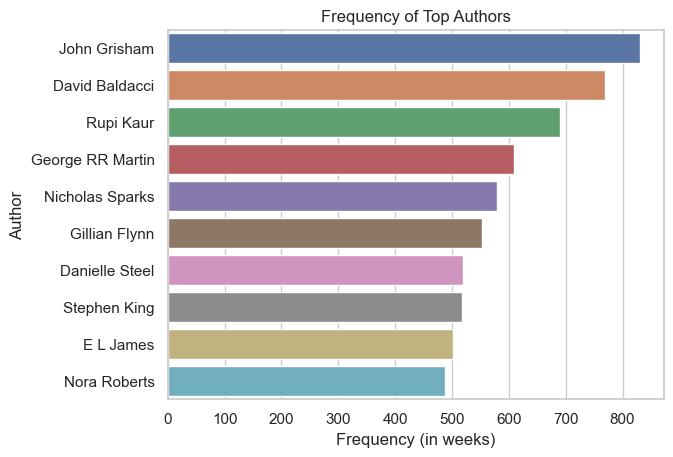

In [85]:
#Turn into a horizontal bar chart
sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")
bar = sns.barplot(x=top_10_authors.values, 
            y=top_10_authors.index, 
            orient='h')
bar.set(ylabel = "Author", xlabel= 'Frequency (in weeks)', title="Frequency of Top Authors")